### Подключение библиотек и скриптов

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

### 1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)

Выбрал Statlog (German Credit Data) Data Set

$`laufkont = status`
                                               
 1 : no checking account                       
 2 : ... < 0 DM                                
 3 : 0<= ... < 200 DM                          
 4 : ... >= 200 DM / salary for at least 1 year

$`laufzeit = duration`
     

$`moral = credit_history`
                                                
 0 : delay in paying off in the past            
 1 : critical account/other credits elsewhere   
 2 : no credits taken/all credits paid back duly
 3 : existing credits paid back duly till now   
 4 : all credits at this bank paid back duly    

$`verw = purpose`
                        
 0 : others             
 1 : car (new)          
 2 : car (used)         
 3 : furniture/equipment
 4 : radio/television   
 5 : domestic appliances
 6 : repairs            
 7 : education          
 8 : vacation           
 9 : retraining         
 10 : business          

$`hoehe = amount`
     

$`sparkont = savings`
                               
 1 : unknown/no savings account
 2 : ... <  100 DM             
 3 : 100 <= ... <  500 DM      
 4 : 500 <= ... < 1000 DM      
 5 : ... >= 1000 DM            

$`beszeit = employment_duration`
                     
 1 : unemployed      
 2 : < 1 yr          
 3 : 1 <= ... < 4 yrs
 4 : 4 <= ... < 7 yrs
 5 : >= 7 yrs        

$`rate = installment_rate`
                   
 1 : >= 35         
 2 : 25 <= ... < 35
 3 : 20 <= ... < 25
 4 : < 20          

$`famges = personal_status_sex`
                                         
 1 : male : divorced/separated           
 2 : female : non-single or male : single
 3 : male : married/widowed              
 4 : female : single                     

$`buerge = other_debtors`
                 
 1 : none        
 2 : co-applicant
 3 : guarantor   

$`wohnzeit = present_residence`
                     
 1 : < 1 yr          
 2 : 1 <= ... < 4 yrs
 3 : 4 <= ... < 7 yrs
 4 : >= 7 yrs        

$`verm = property`
                                              
 1 : unknown / no property                    
 2 : car or other                             
 3 : building soc. savings agr./life insurance
 4 : real estate                              

$`alter = age`
     

$`weitkred = other_installment_plans`
           
 1 : bank  
 2 : stores
 3 : none  

$`wohn = housing`
             
 1 : for free
 2 : rent    
 3 : own     

$`bishkred = number_credits`
         
 1 : 1   
 2 : 2-3 
 3 : 4-5 
 4 : >= 6

$`beruf = job`
                                               
 1 : unemployed/unskilled - non-resident       
 2 : unskilled - resident                      
 3 : skilled employee/official                 
 4 : manager/self-empl./highly qualif. employee

$`pers = people_liable`
              
 1 : 3 or more
 2 : 0 to 2   

$`telef = telephone`
                              
 1 : no                       
 2 : yes (under customer name)

$`gastarb = foreign_worker`
        
 1 : yes
 2 : no 

$`kredit = credit_risk`
         
 0 : bad 
 1 : good




#### Загрузка данных

In [59]:
data = pd.read_csv("SouthGermanCredit.asc", sep=' ')
data.head(5)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


### 2. сделать обзорный анализ выбранного датасета

#### Проанализируем количественные переменные

In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
laufkont,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
laufzeit,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
moral,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
verw,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
hoehe,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
sparkont,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
beszeit,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
famges,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
buerge,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


#### Проанализируем категориальные переменные

In [61]:
# data.describe(include=['O']).T

#### Проанализируем целевую переменную

In [62]:
data['kredit'].value_counts()

1    700
0    300
Name: kredit, dtype: int64

#### Проанализируем пропуски

In [63]:
data.isnull().sum()

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

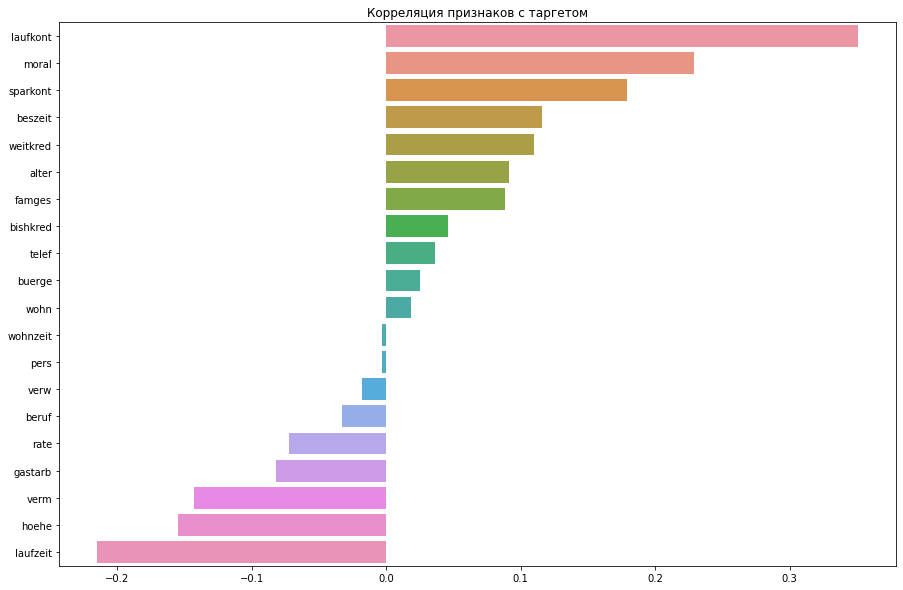

In [64]:
target_name = "kredit"
corr_with_target = data.corr()[target_name].sort_values(ascending=False)[1:]
plt.figure(figsize=(15, 10))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Корреляция признаков с таргетом')
plt.show()

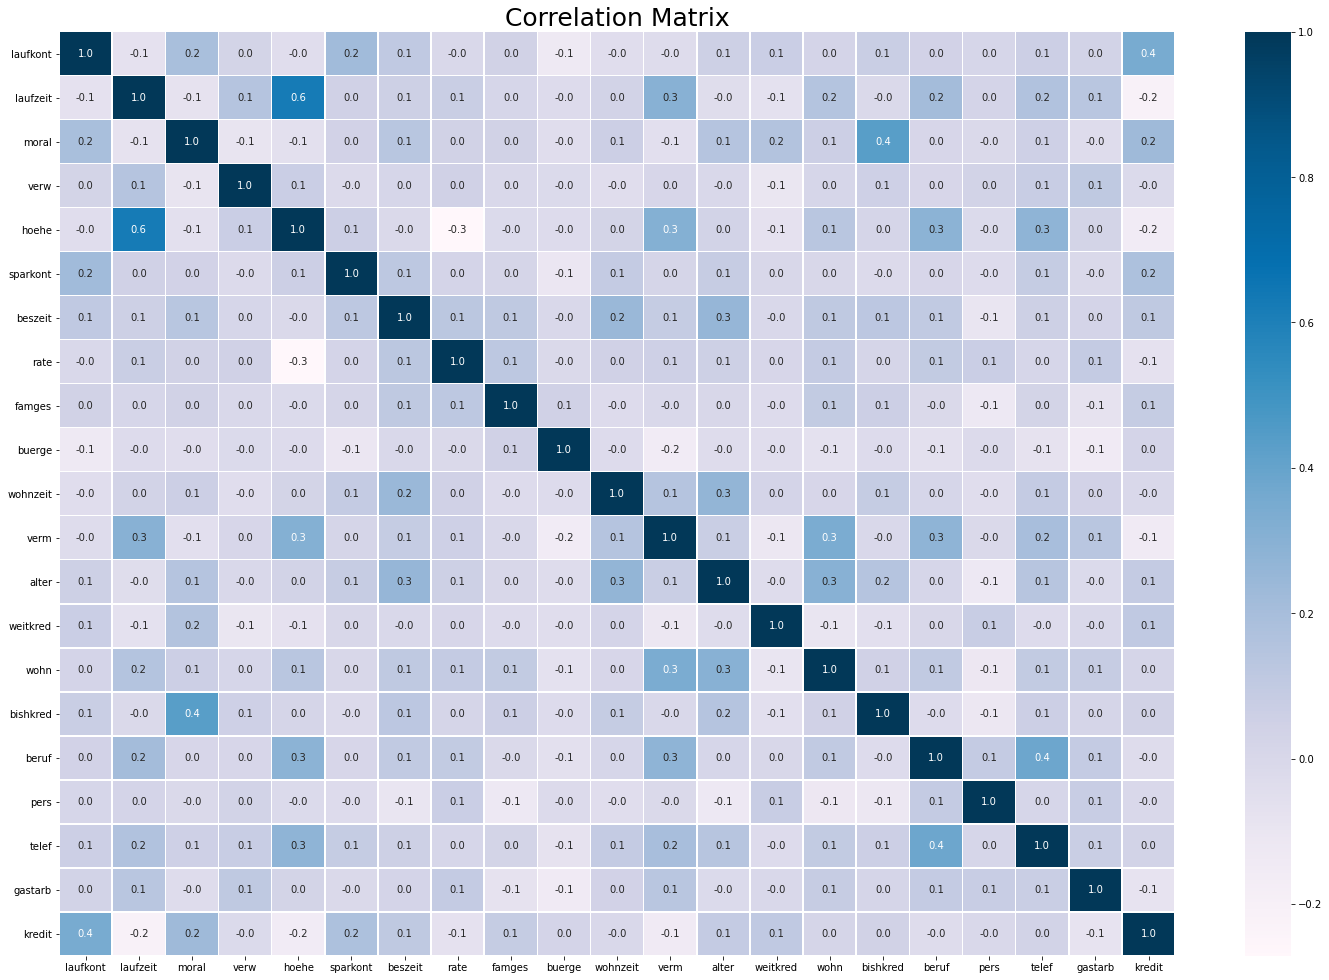

In [65]:
# Correlation Matrix
f, ax = plt.subplots(figsize = [25, 17])
sns.heatmap(data.corr(), annot=True, fmt='.1f', linewidths=.5, ax=ax, cmap = 'PuBu' )
ax.set_title('Correlation Matrix', fontsize=25)
plt.show()

### 3. сделать feature engineering

К полям:
-  применим OHE-кодирование
- laufzeit, hoehe, alter - standardScaler
- gastarb, telef, pers оставим пока как есть, laufkont, moral, verw, sparkont, beszeit, rate, famges, buerge, wohnzeit, verm, weitkred, wohn, bishkred, beruf тоже оставим

In [66]:
x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [67]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]


from sklearn.preprocessing import StandardScaler

base_cols = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit',
              'verm', 'weitkred', 'wohn', 'bishkred', 'beruf']
continuos_cols = ['laufzeit', 'hoehe', 'alter']

continuos_transformers = []
cat_transformers = []
base_transformers = []

for cont_col in continuos_cols:
    transfomer =  Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('standard', StandardScaler())
            ])
    continuos_transformers.append((cont_col, transfomer))
    
# for cat_col in cat_cols:
#     cat_transformer = Pipeline([
#                 ('selector', ColumnSelector(key=cat_col)),
#                 ('ohe', OHEEncoder(key=cat_col))
#             ])
#     cat_transformers.append((cat_col, cat_transformer))
    
for base_col in base_cols:
    base_transformer = Pipeline([
                ('selector', NumberSelector(key=base_col))
            ])
    base_transformers.append((base_col, base_transformer))

Теперь объединим все наши трансформеры с помощью FeatureUnion

In [68]:
from sklearn.pipeline import FeatureUnion

# feats = FeatureUnion(continuos_transformers+cat_transformers+base_transformers)
feats = FeatureUnion(continuos_transformers+base_transformers)
feature_processing = Pipeline([('feats', feats)])

feature_processing.fit_transform(X_train)

array([[ 1.23159172e+00,  1.79151936e+00, -8.22306639e-01, ...,
         2.00000000e+00,  1.00000000e+00,  3.00000000e+00],
       [ 2.56154007e-01, -4.31285795e-01,  1.64371630e-01, ...,
         2.00000000e+00,  1.00000000e+00,  3.00000000e+00],
       [ 2.20702943e+00,  1.14226114e+00,  2.13772817e+00, ...,
         1.00000000e+00,  1.00000000e+00,  3.00000000e+00],
       ...,
       [-1.36957551e+00, -6.34335662e-01,  6.12861752e-01, ...,
         2.00000000e+00,  3.00000000e+00,  2.00000000e+00],
       [-1.20700256e+00,  1.26581000e+00,  8.81955825e-01, ...,
         2.00000000e+00,  2.00000000e+00,  4.00000000e+00],
       [ 2.56154007e-01,  3.10483659e-03,  7.46736053e-02, ...,
         2.00000000e+00,  1.00000000e+00,  4.00000000e+00]])

### 4. обучить любой классификатор (какой вам нравится)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from catboost import CatBoostClassifier

from sklearn.metrics import f1_score, roc_auc_score, precision_score, \
                            classification_report, precision_recall_curve, confusion_matrix

In [70]:
# Функция обучения модели и расчета метрик
def get_metrics(classifier):
    from sklearn.metrics import f1_score
    from sklearn.metrics import roc_auc_score
    
    #запустим кросс-валидацию
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=16, scoring='roc_auc')
    cv_score = np.mean(cv_scores)
    cv_score_std = np.std(cv_scores)

    #обучим пайплайн на всем тренировочном датасете
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)[:, 1]
    
    # расчтаем Precision, Recall, F_score, Roc auc
    b = 1
    precision, recall, thresholds = precision_recall_curve(y_test.values, y_score)
    fscore = (1 + b**2) * (precision * recall) / (b**2 * precision + recall)
    roc_auc = roc_auc_score(y_test, y_score)
    ix = np.argmax(fscore)
             
    return roc_auc, precision[ix], recall[ix], fscore[ix]

In [71]:
classifier_1 = Pipeline([
    ('features',feats),
    ('classifier', LogisticRegression(random_state = 42)),
])

classifier_2 = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

classifier_3 = Pipeline([
    ('features',feats),
    ('classifier', DecisionTreeClassifier(max_depth=4, random_state=42)),
])

frozen_params = {
    'eval_metric': 'F1',
    'auto_class_weights': 'Balanced',
    'silent': True,
    'one_hot_max_size': 20,
    'early_stopping_rounds': 50,
    'boosting_type': 'Ordered',
    'allow_writing_files': False
}

classifier_4 = Pipeline([
    ('features',feats),
    ('classifier', CatBoostClassifier(
    **frozen_params,
    depth=4,
    iterations=400,
    learning_rate=0.1,
    l2_leaf_reg=2.5,
    bagging_temperature=1.5
)),
])

In [72]:
metrics = {'LogisticRegression': classifier_1, 
           'RandomForestClassifier': classifier_2, 
           'DecisionTreeClassifier': classifier_3,
          'CacbctBoostClassifier': classifier_4
          }
info = pd.DataFrame(columns=metrics.keys())

In [73]:
%%time

for metric, value in metrics.items():
    print(metric, value)
    roc_auc, precision, recall, fscore = get_metrics(value)
    info.loc[f'roc_auc', metric] = roc_auc
    info.loc[f'precision', metric] = precision
    info.loc[f'recall', metric] = recall
    info.loc[f'fscore', metric] = fscore

LogisticRegression Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('laufzeit',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='laufzeit')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('hoehe',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='hoehe')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('alter',
                                                 Pipeline(steps=[('selector',
              

#### Проверяем качество

In [74]:
info

,LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,CatBoostClassifier
roc_auc,0.760912,0.766724,0.693561,0.736866
precision,0.71978,0.739884,0.691099,0.759259
recall,0.97037,0.948148,0.977778,0.911111
fscore,0.826498,0.831169,0.809816,0.828283


CatBoostClassifier показывает лучший рез-т по precision, согласно условиям задачи "It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1)." рез-т по precision более важен чем рез-т по recall

In [92]:
predictions = classifier_4.predict(X_test)
mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(0.28, -0.2763532763532768)

#### Feature importance признаков

In [99]:
cbc_features = pd.DataFrame(classifier_4[1].feature_importances_, 
                        base_cols + continuos_cols, 
                        columns=['coefficient'])
cbc_features.head()

,coefficient
laufkont,11.024324
moral,20.188460
verw,10.173471
sparkont,10.977373
beszeit,5.200731


### 5. разобраться с SHAP и построить важности признаков для:

In [166]:
import shap

# load JS visualization code to notebook
shap.initjs()

### 6. всего тестового набора данных (summary_plot - дать интерпретацию)

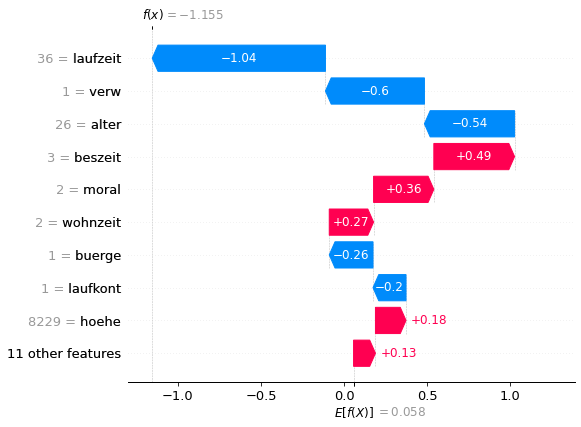

In [167]:
explainer = shap.Explainer(classifier_4[1])
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [168]:
shap.plots.force(shap_values[0])

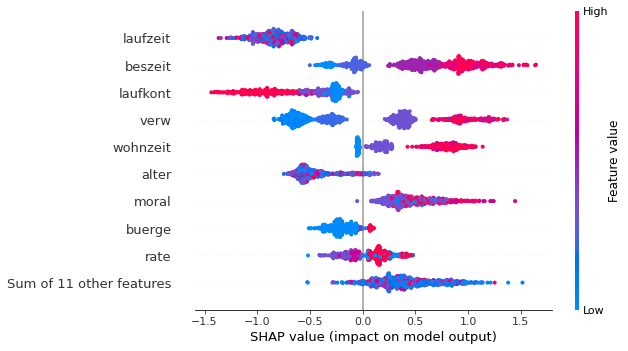

In [169]:
shap.plots.beeswarm(shap_values)

По графику видим положительное влияние beszeit(Текущая занятость), чем выше текущая занятость тем больше вероятность что клиент положителен.

Так же интересно наблюдать влияние признака verw(Назначение), видно что если клиент берет кредит на автомобиль, то больше вероятности что клиент отрицателен, чем если клиент берет кредит на бизнес.

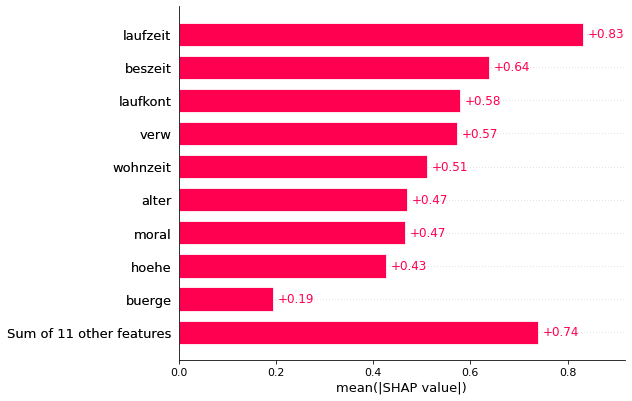

In [170]:
shap.plots.bar(shap_values)

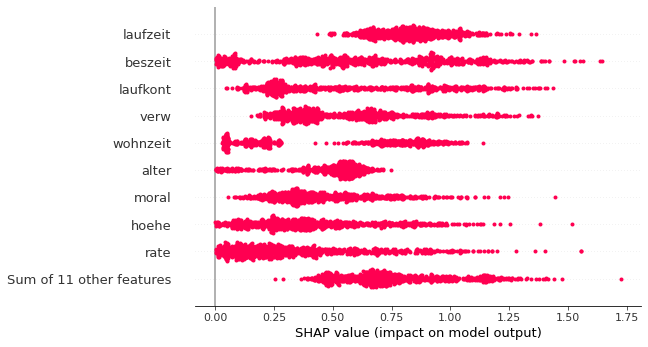

In [172]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

### 7. для топ 10%

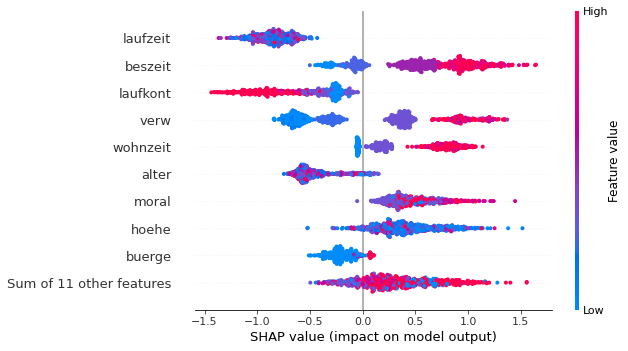

In [171]:
shap.plots.beeswarm(shap_values,  max_display=10)

### 8. для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

In [207]:
shap.plots.force(shap_values[0], feature_names=['laufkont'])